
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [ ]:
# Set your student number
student_number = '400101861'
Name = 'ahmadreza'
Last_Name = 'majlesara'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [ ]:
!pip install tsp_solver2

In [ ]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [ ]:
class TSP:
  def __init__(self, num_cities, cities = None):
        self.num_cities = num_cities
        # if cities is None --> create randomly placed cities with respect to num_cities
        if cities is None:
            cities = []
            for i in range(num_cities):
                # note : city axis values can be from 0 to 1000
                x = random.randint(0, 1000)
                y = random.randint(0, 1000)
                cities.append((x, y))
            self.cities = cities
        #else --> use the given data
        else:
            self.cities = cities
            self.num_cities = len(cities)

  def distance(self, A, B):
        # return distance between city with index/number A and B in cities array
        city_A = self.cities[A]
        city_B = self.cities[B]
        return ((city_A[0] - city_B[0]) ** 2 + (city_A[1] - city_B[1]) ** 2) ** 0.5


  def tour_length(self, tour):
        # get the list of cities and return the tour length
        length = 0
        for i in range(len(tour) - 1):
            length += self.distance(tour[i], tour[i+1])
        return length


  def shortest_tour(self, tours):
        # get a list of toues and return : shortest_tour, shortest_length
        shortest_length = float('inf')
        shortest_tour = None
        for tour in tours:
            tour_length = self.tour_length(tour)
            if tour_length < shortest_length:
                shortest_length = tour_length
                shortest_tour = tour
        return shortest_tour, shortest_length

  def plot_tour(self, tour):
        #  tour will be given an its expected to plot a good representation of the tour and cities
        x = [city[0] for city in self.cities]
        y = [city[1] for city in self.cities]
        plt.plot(x, y, 'bo')
        for i in range(len(tour) - 1):
            city_A = self.cities[tour[i]]
            city_B = self.cities[tour[i+1]]
            plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'b-')
        plt.title('Tour')
        plt.xlabel('x coordinate')
        plt.ylabel('y coordinate')
        plt.grid('True','both')
        plt.minorticks_on()
        plt.show()

  def nearest_neighbor(self, A, cities, count = None):
        # city "A" will be given and we expect
        # if count == None -->  get the nearest neighbor from the list "cities"
        # else --> we need "count" closest neighbors
        if count is None:
            count = 1
        distances = []
        for i in range(len(cities)):
            if i != A:
                distance = self.distance(A, i)
                distances.append((i, distance))
        distances.sort(key=lambda x: x[1])
        neighbors = [city[0] for city in distances[:count]]
        return neighbors

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [ ]:
def generate_permutations(start, end):
    # generate all possible permutations of numbers from start to end
    numbers = list(range(start, end))
    perms = itertools.permutations(numbers)
    perms = [perm + (perm[0],) for perm in perms]
    return list(perms)

def alltours_tsp(tsp):
    #  generate all possible tours and return the shortest tour
    all_tours = generate_permutations(0, tsp.num_cities)
    shortest_tour = tsp.shortest_tour(all_tours)
    return shortest_tour

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [ ]:
# create a country using the TSP class
tsp = TSP(5)
# run the algorithm
start_time = time.time_ns()
shortest_tour = alltours_tsp(tsp)
end_time = time.time_ns()
print(end_time - start_time)
shortest_tour_array = shortest_tour[0]
shortest_tour_length = shortest_tour[1]
# present the answer
print('shortest tour is:' + str(shortest_tour_array))
print('shortest length :' + str(shortest_tour_length))


6783866
shortest tour is:(0, 3, 2, 4, 1, 0)
shortest length :2329.609004106732


Visualize your answer for the TSP problem

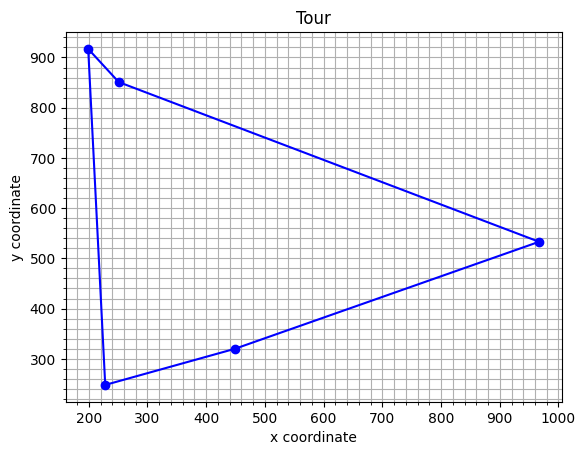

In [ ]:
# plot the answer using the TSP util methods
tsp.plot_tour(shortest_tour_array)



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

[-8.65319621 -4.60546153 -0.44412084  3.86671104]


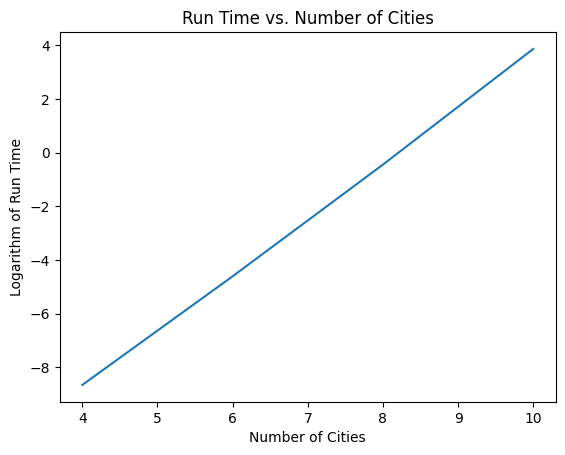

In [ ]:
# TODO: create different countries
# TODO: run the algorithm and consider its run time
# TODO: plot the run times accordingly
# note : you can use log(time) for better visualisation
# create different countries
countries = [TSP(4), TSP(6), TSP(8), TSP(10)]

# run the algorithm and consider its run time
runtimes = []
for country in countries:
    start_time = time.time_ns()
    shortest_tour = alltours_tsp(country)
    end_time = time.time_ns()
    runtime = float(end_time - start_time)/(10**9)
    runtimes.append(runtime)

# plot the run times accordingly
print(np.log(runtimes))
plt.plot([4, 6, 8, 10], np.log(runtimes))
plt.title('Run Time vs. Number of Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Logarithm of Run Time')
plt.show()

# note : given example is using log

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [ ]:
def random_initial(tsp):
  # TODO : create a random tour and return tour, length
  pass

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [ ]:
def nearest_neighbor_initial(tsp):
  # TODO : create a nearest neighbor tour as above and return tour, length
  pass

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [ ]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
    # TODO : repeat nearest_neighbor_initial for better performance
    # note : if repetitions == None --> repetition = tsp.city_num
    pass

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

In [ ]:
# TODO: create different countries
# TODO: run the algorithm and consider its tour length
# TODO: plot/print the tour lengths accordingly

[6459.622858215224, 4976.908738715434, 4976.908738715434, 4937.749903050973]


Does repetition make our answer optimal? "your short answer here!"

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [ ]:
def beam_search_initial(tsp, n, iter):
  # TODO : initial n starting points and name it as queue

  # TODO : in every iter : (iter range could not be less than tsp.city_num)
    # TODO : use the queue elements to create n new elements from each (new elements contain more cities)
    # TODO : filter these n^2 elements and just use n of them and name them as queue

  # TODO : return tour, length of the best option in queue
  pass

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [ ]:
# TODO: create a country
# TODO: run the needed algorithms and consider their tour length
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.

random_initial length :  14374.011968910045
nearest_neighbor_initial length :  5180.199704772331
repeated_nearest_neighbor_initial length :  5132.343542346472
beam_search_initial length :  6154.450913557053


Plot these tours and compare them visually.

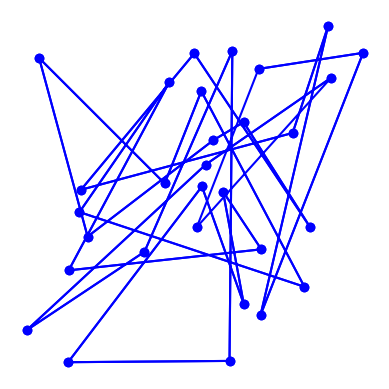

In [ ]:
# TODO: plot the tours accordingly (random)

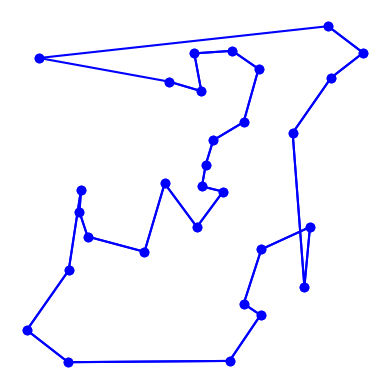

In [ ]:
# TODO: plot the tours accordingly (nn)

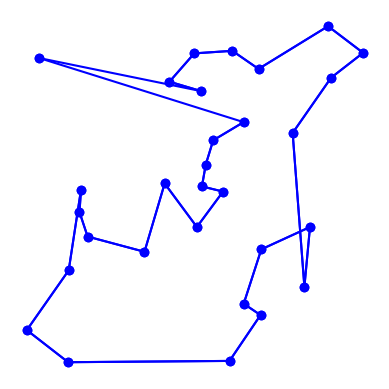

In [ ]:
# TODO: plot the tours accordingly (rnn)

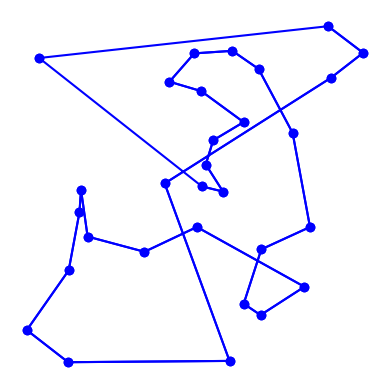

In [ ]:
# TODO: plot the tours accordingly (beam)

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [ ]:
def lin_kernighan(tsp, initial, iterations=10):
    # TODO : init

    # TODO : for iteration :
      # TODO : for every distinct pair of (i, j):
        # TODO : If the reverse technique improves our tour, replace the reversed version with the actual version.
        # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10

    # TODO :  return tour, distance
    pass


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

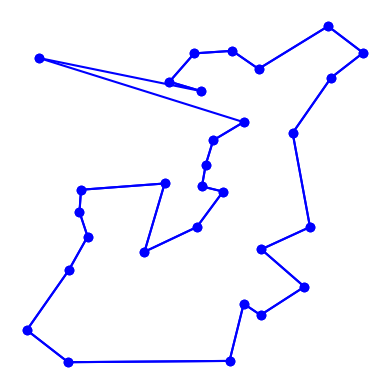

4925.109743108109


In [ ]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [ ]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
    # TODO : init

    # TODO : for iterantion:
      # TODO : get a neighbor
      # note : create neighbors using the reversing method,  but this time improvement is not important
      # TODO : with the acceptence probability, accept!
      # TODO : if it has a improvement, accept!
      # TODO : update tour if accepted
      # TODO : update temp

    # return tour, length
    pass

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

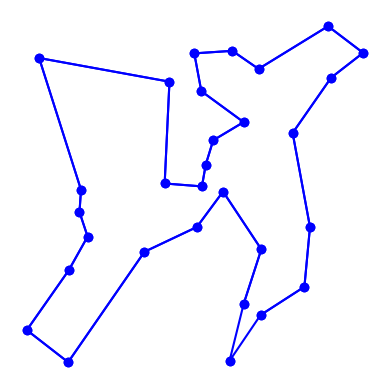

4809.127773232656


In [ ]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

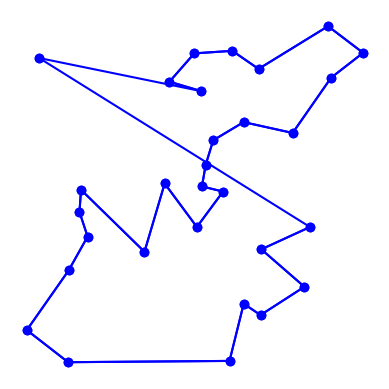

5088.321690342922


In [ ]:
# path = solve_tsp(tsp.distances)
# tsp.plot_tour(path)
# print(tsp.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

In [ ]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function

treshhold :  5088.321690342922
lkh random :  5560.5087325268305
lkh nn :  4972.965905533968
lkh rnn :  4925.109743108109
lkh beam :  5195.99892896092
simulated random :  4957.463069159989
simulated nn :  4594.853524659973
simulated rnn :  5132.343542346472
simulated beam :  4878.484568419222
